# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
df=pd.read_csv(r"https://raw.githubusercontent.com/azaz6216/dataset/refs/heads/main/data%20-%20Copy.csv")

# EDA (Exploratory Data Analysis)

### a. Understanding the Dataset

- Head of the dataset
- Shape of the data set
- Types of columns
- Information about data set
- Summary of the data set

In [3]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

### b. Cleaning the Dataset

- Dropping duplicate values
- Checking NULL values
- Checking for 0 value and replacing it

In [4]:
df = df.drop_duplicates()


In [5]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

### Checking for specified value occurance in feature

### Fill the zero

In [6]:
for col in df.columns:
    if df[col].dtype != 'object' and col != 'diagnosis':
        df[col] = df[col].replace(0, np.NaN) 
        mean_val = df[col].mean(skipna=True) 
        df[col] = df[col].replace(np.NaN, mean_val) 

In [7]:
y=(df==0).sum()
y

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
Unnamed: 32                0
dtype: int64

### Drop unneccessary columns

In [8]:
df=df.drop(["id"],axis=1)
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760        0.300100             0.147100   
1            0.08474           0.07864        0.086900             0.070170   
2            0.10960           0.15990        0.197400             0.127900   
3            0.14250           0.28390        0.241400             0.105200   
4            0.10030           0.13280        0.198000             0.104300   
..               ...               ...             ...                  ...   
564          0.11100           0.11590        0.243900             0.138900   
565          0.09780           0.10340        0.144000             0.097910   
566          0.08455           0.10230        0.092510             0.053020   
567          0.11780           0.27700        0.351400             0.152000   
568          0.05263           0.04362        0.090876             0.050063   

     symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0           0.2419  ...          17.33           184.60      2019.0   
1           0.1812  ...          23.41           158.80      1956.0   
2           0.2069  ...          25.53           152.50      1709.0   
3           0.2597  ...          26.50            98.87       567.7   
4           0.1809  ...          16.67           152.20      1575.0   
..             ...  ...            ...              ...         ...   
564         0.1726  ...          26.40           166.10      2027.0   
565         0.1752  ...          38.25           155.00      1731.0   
566         0.1590  ...          34.12           126.70      1124.0   
567         0.2397  ...          39.42           184.60      1821.0   
568         0.1587  ...          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560         0.711900   
1             0.12380            0.18660         0.241600   
2             0.14440            0.42450         0.450400   
3             0.20980            0.86630         0.686900   
4             0.13740            0.20500         0.400000   
..                ...                ...              ...   
564           0.14100            0.21130         0.410700   
565           0.11660            0.19220         0.321500   
566           0.11390            0.30940         0.340300   
567           0.16500            0.86810         0.938700   
568           0.08996            0.06444         0.278553   

     concave points_worst  symmetry_worst  fractal_dimension_worst  \
0                0.265400          0.4601                  0.11890   
1                0.186000          0.2750                  0.08902   
2                0.243000          0.3613                  0.08758   
3                0.257500          0.6638                  0.17300   
4                0.162500          0.2364                  0.07678   
..                    ...             ...                      ...   
564              0.221600          0.2060                  0.07115   
565              0.162800          0.2572               

In [9]:
df=df.dropna(axis=1)
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760        0.300100             0.147100   
1            0.08474           0.07864        0.086900             0.070170   
2            0.10960           0.15990        0.197400             0.127900   
3            0.14250           0.28390        0.241400             0.105200   
4            0.10030           0.13280        0.198000             0.104300   
..               ...               ...             ...                  ...   
564          0.11100           0.11590        0.243900             0.138900   
565          0.09780           0.10340        0.144000             0.097910   
566          0.08455           0.10230        0.092510             0.053020   
567          0.11780           0.27700        0.351400             0.152000   
568          0.05263           0.04362        0.090876             0.050063   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560         0.711900   
1        1956.0           0.12380            0.18660         0.241600   
2        1709.0           0.14440            0.42450         0.450400   
3         567.7           0.20980            0.86630         0.686900   
4        1575.0           0.13740            0.20500         0.400000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130         0.410700   
565      1731.0           0.11660            0.19220         0.321500   
566      1124.0           0.11390            0.30940         0.340300   
567      1821.0           0.16500            0.86810         0.938700   
568       268.6           0.08996            0.06444         0.278553   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.265400          0.4601                  0.11890  
1                0.186000          0.2750                  0.08902  
2                0.243000          0.3613                  0.08758  
3                0.257500          0.6638                  0.17300  
4                0.162500          0.2364                  0.07678  
..                    ...         

### Convert object type to int type(diagnosis)

<Axes: xlabel='diagnosis', ylabel='count'>

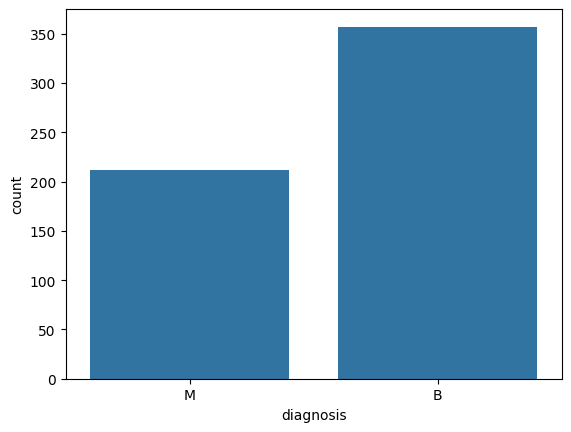

In [10]:
sns.countplot(x="diagnosis",data=df)

In [11]:
data=df

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
lb=LabelEncoder()

In [14]:
data['diagnosis']=lb.fit_transform(data["diagnosis"])

C:\Users\User\AppData\Local\Temp\ipykernel_13792\2344739718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['diagnosis']=lb.fit_transform(data["diagnosis"])


In [15]:
data

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760        0.300100             0.147100   
1            0.08474           0.07864        0.086900             0.070170   
2            0.10960           0.15990        0.197400             0.127900   
3            0.14250           0.28390        0.241400             0.105200   
4            0.10030           0.13280        0.198000             0.104300   
..               ...               ...             ...                  ...   
564          0.11100           0.11590        0.243900             0.138900   
565          0.09780           0.10340        0.144000             0.097910   
566          0.08455           0.10230        0.092510             0.053020   
567          0.11780           0.27700        0.351400             0.152000   
568          0.05263           0.04362        0.090876             0.050063   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560         0.711900   
1        1956.0           0.12380            0.18660         0.241600   
2        1709.0           0.14440            0.42450         0.450400   
3         567.7           0.20980            0.86630         0.686900   
4        1575.0           0.13740            0.20500         0.400000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130         0.410700   
565      1731.0           0.11660            0.19220         0.321500   
566      1124.0           0.11390            0.30940         0.340300   
567      1821.0           0.16500            0.86810         0.938700   
568       268.6           0.08996            0.06444         0.278553   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.265400          0.4601                  0.11890  
1                0.186000          0.2750                  0.08902  
2                0.243000          0.3613                  0.08758  
3                0.257500          0.6638                  0.17300  
4                0.162500          0.2364                  0.07678  
..                    .

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int32  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

# Data Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

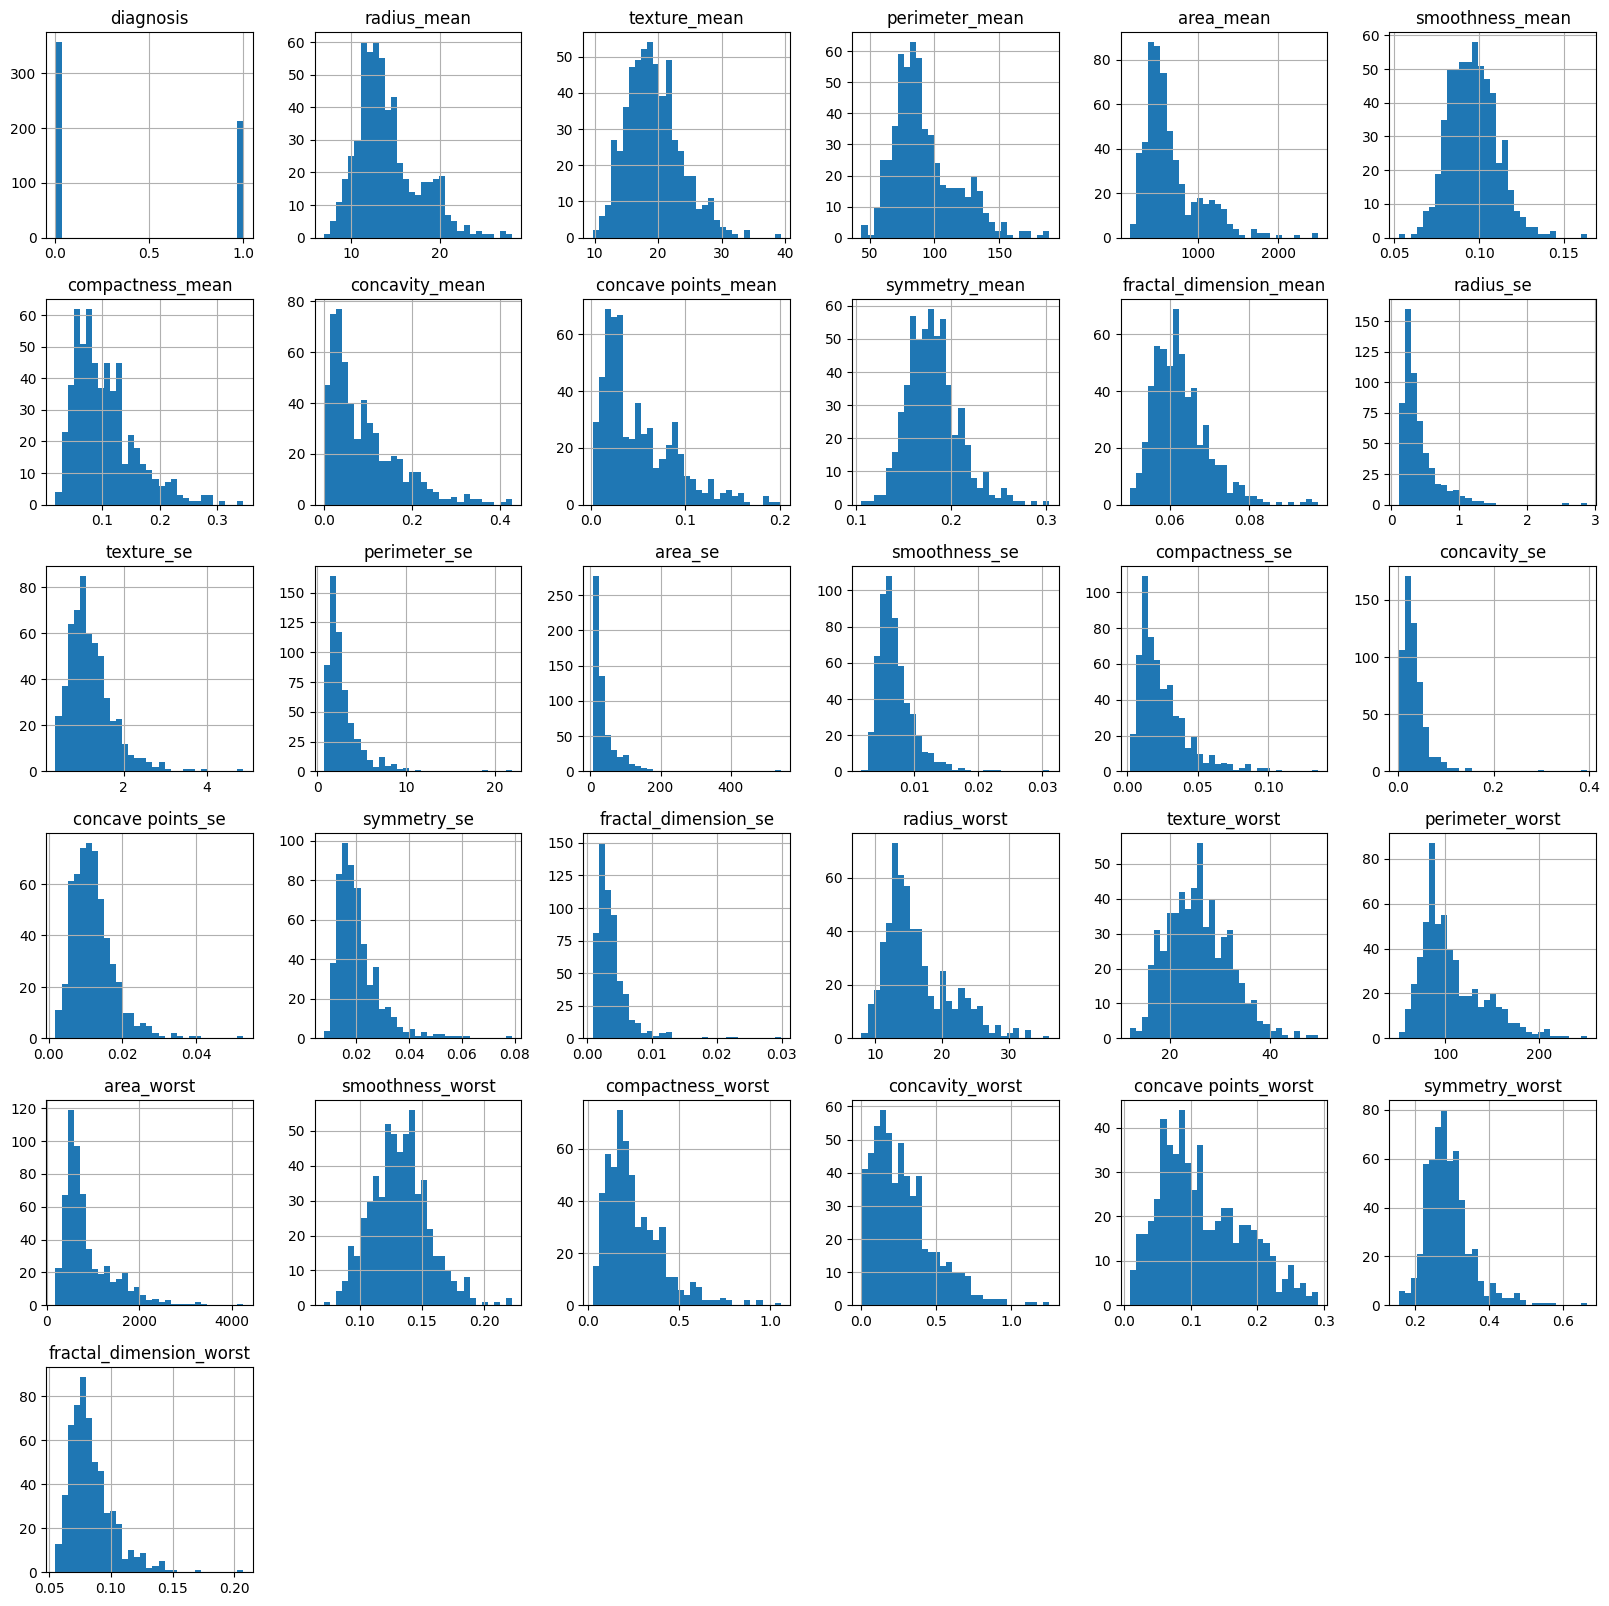

In [17]:
data.hist(bins=31,figsize=(20,20))
plt.show

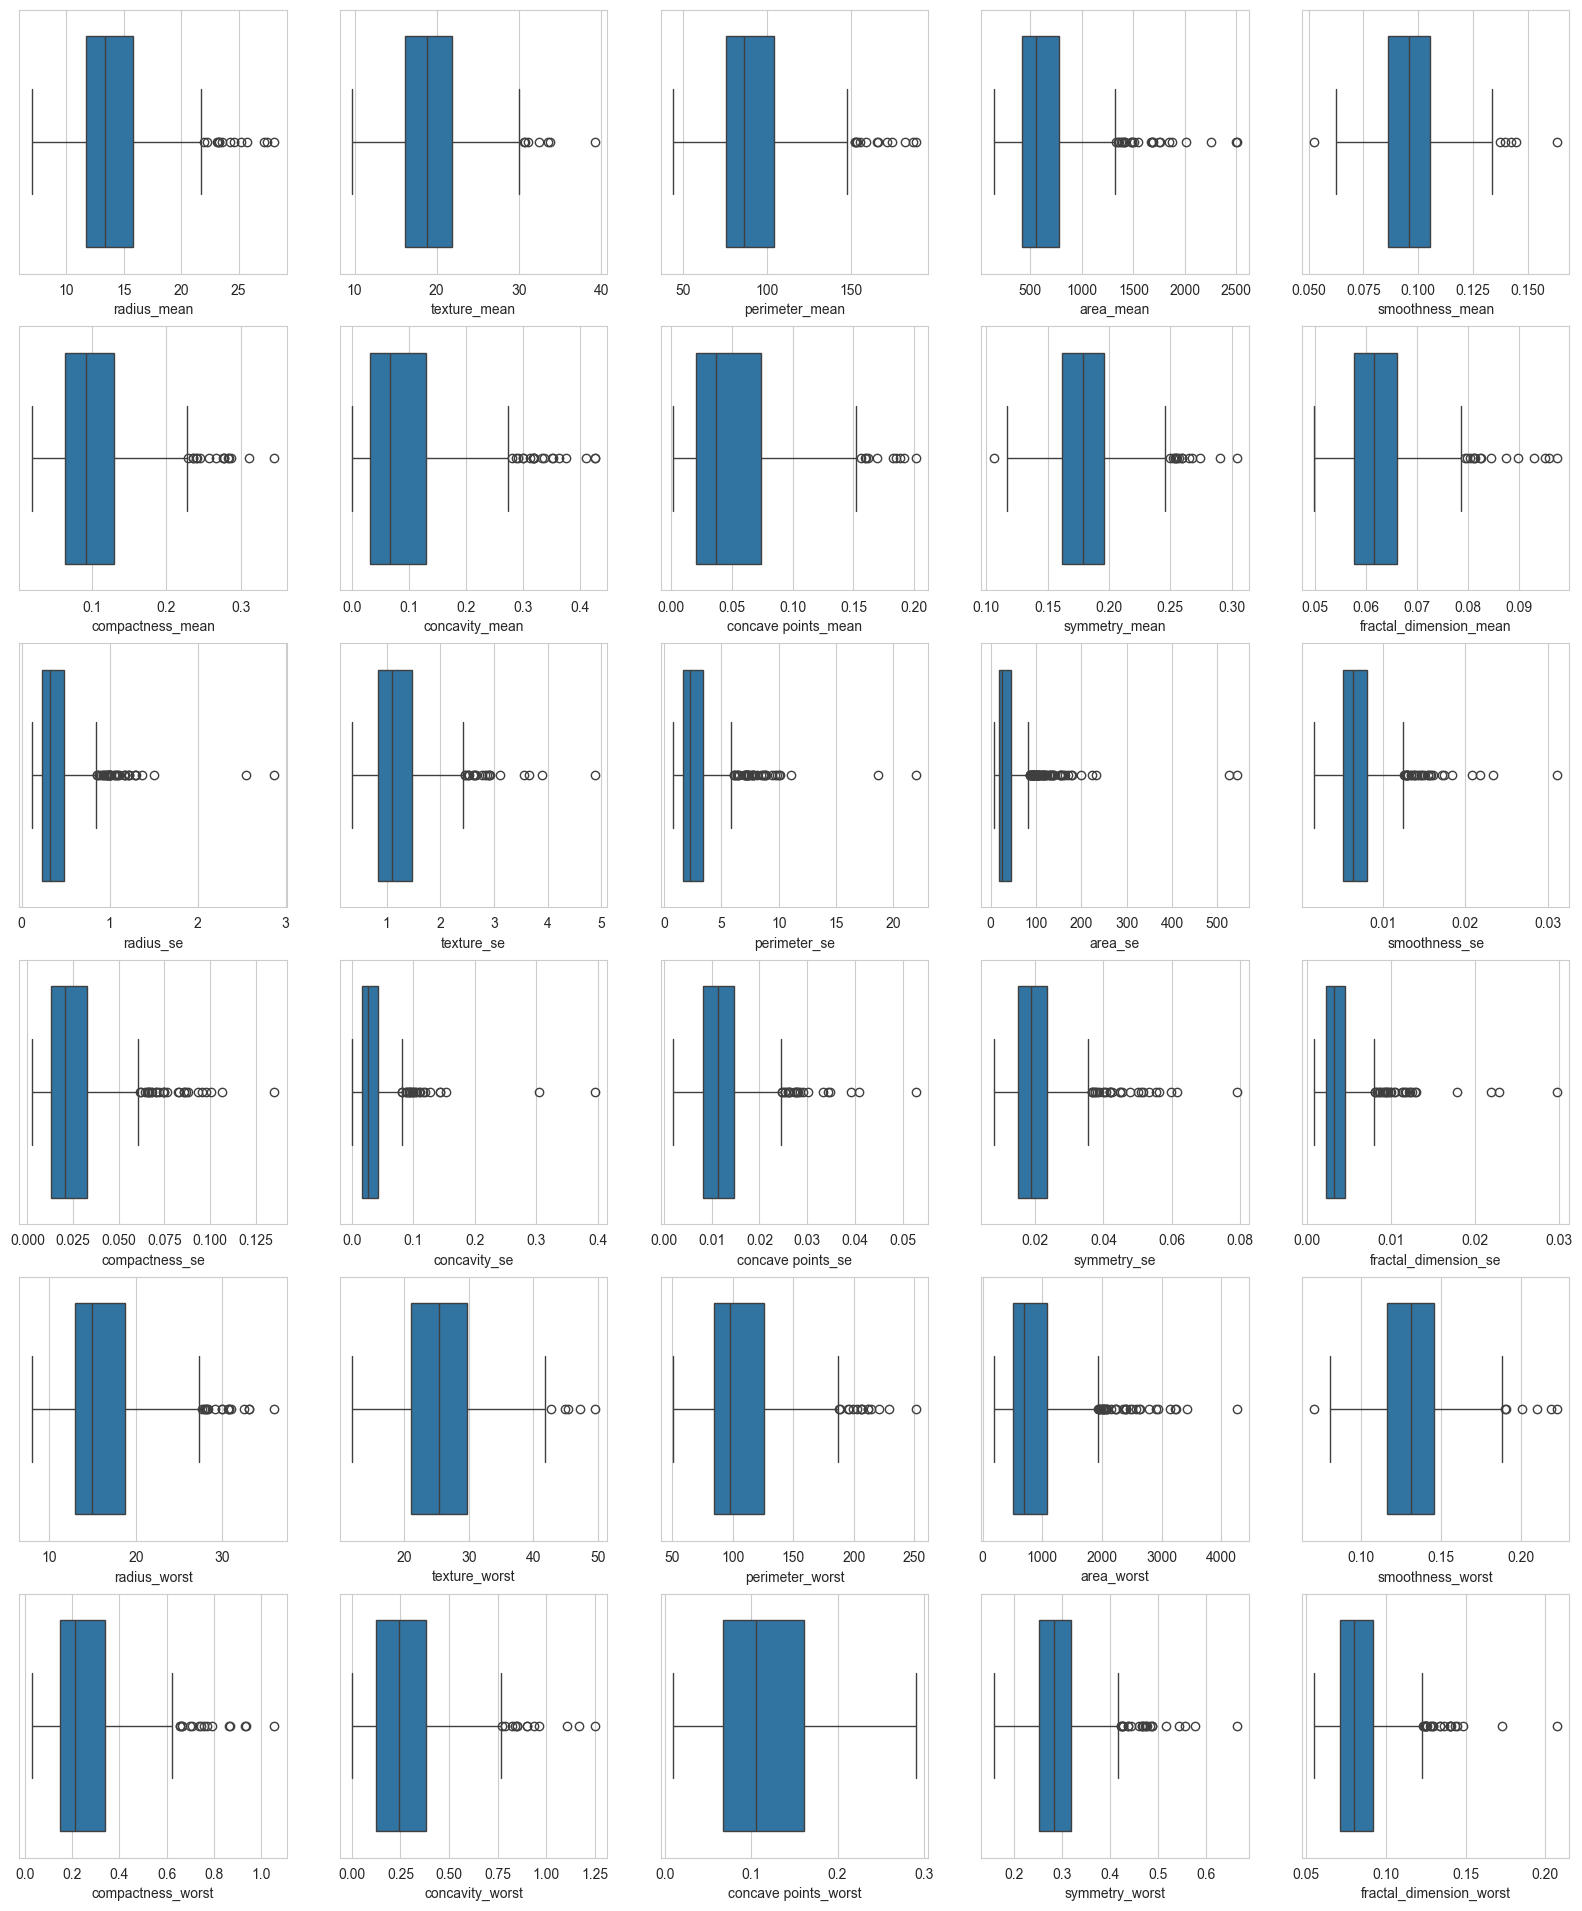

In [18]:
plt.figure(figsize=(20,24)) 
sns.set_style(style='whitegrid')

plt.subplot(6,5,1)
sns.boxplot(x='radius_mean',data=data)
plt.subplot(6,5,2)
sns.boxplot(x='texture_mean',data=data)
plt.subplot(6,5,3)
sns.boxplot(x='perimeter_mean',data=data)
plt.subplot(6,5,4)
sns.boxplot(x='area_mean',data=data)
plt.subplot(6,5,5)
sns.boxplot(x='smoothness_mean',data=data)

plt.subplot(6,5,6)
sns.boxplot(x='compactness_mean',data=data)
plt.subplot(6,5,7)
sns.boxplot(x='concavity_mean',data=data)
plt.subplot(6,5,8)
sns.boxplot(x='concave points_mean',data=data)
plt.subplot(6,5,9)
sns.boxplot(x='symmetry_mean',data=data)
plt.subplot(6,5,10)
sns.boxplot(x='fractal_dimension_mean',data=data)

plt.subplot(6,5,11)
sns.boxplot(x='radius_se',data=data)
plt.subplot(6,5,12)
sns.boxplot(x='texture_se',data=data)
plt.subplot(6,5,13)
sns.boxplot(x='perimeter_se',data=data)
plt.subplot(6,5,14)
sns.boxplot(x='area_se',data=data)
plt.subplot(6,5,15)
sns.boxplot(x='smoothness_se',data=data)

plt.subplot(6,5,16)
sns.boxplot(x='compactness_se',data=data)
plt.subplot(6,5,17)
sns.boxplot(x='concavity_se',data=data)
plt.subplot(6,5,18)
sns.boxplot(x='concave points_se',data=data)
plt.subplot(6,5,19)
sns.boxplot(x='symmetry_se',data=data)
plt.subplot(6,5,20)
sns.boxplot(x='fractal_dimension_se',data=data)

plt.subplot(6,5,21)
sns.boxplot(x='radius_worst',data=data)
plt.subplot(6,5,22)
sns.boxplot(x='texture_worst',data=data)
plt.subplot(6,5,23)
sns.boxplot(x='perimeter_worst',data=data)
plt.subplot(6,5,24)
sns.boxplot(x='area_worst',data=data)
plt.subplot(6,5,25)
sns.boxplot(x='smoothness_worst',data=data)

plt.subplot(6,5,26)
sns.boxplot(x='compactness_worst',data=data)
plt.subplot(6,5,27)
sns.boxplot(x='concavity_worst',data=data)
plt.subplot(6,5,28)
sns.boxplot(x='concave points_worst',data=data)
plt.subplot(6,5,29)
sns.boxplot(x='symmetry_worst',data=data)
plt.subplot(6,5,30)
sns.boxplot(x='fractal_dimension_worst',data=data)

plt.show()


array([[<Axes: xlabel='diagnosis', ylabel='diagnosis'>,
        <Axes: xlabel='radius_mean', ylabel='diagnosis'>,
        <Axes: xlabel='texture_mean', ylabel='diagnosis'>,
        <Axes: xlabel='perimeter_mean', ylabel='diagnosis'>,
        <Axes: xlabel='area_mean', ylabel='diagnosis'>,
        <Axes: xlabel='smoothness_mean', ylabel='diagnosis'>,
        <Axes: xlabel='compactness_mean', ylabel='diagnosis'>,
        <Axes: xlabel='concavity_mean', ylabel='diagnosis'>,
        <Axes: xlabel='concave points_mean', ylabel='diagnosis'>,
        <Axes: xlabel='symmetry_mean', ylabel='diagnosis'>,
        <Axes: xlabel='fractal_dimension_mean', ylabel='diagnosis'>,
        <Axes: xlabel='radius_se', ylabel='diagnosis'>,
        <Axes: xlabel='texture_se', ylabel='diagnosis'>,
        <Axes: xlabel='perimeter_se', ylabel='diagnosis'>,
        <Axes: xlabel='area_se', ylabel='diagnosis'>,
        <Axes: xlabel='smoothness_se', ylabel='diagnosis'>,
        <Axes: xlabel='compactness_se', yla

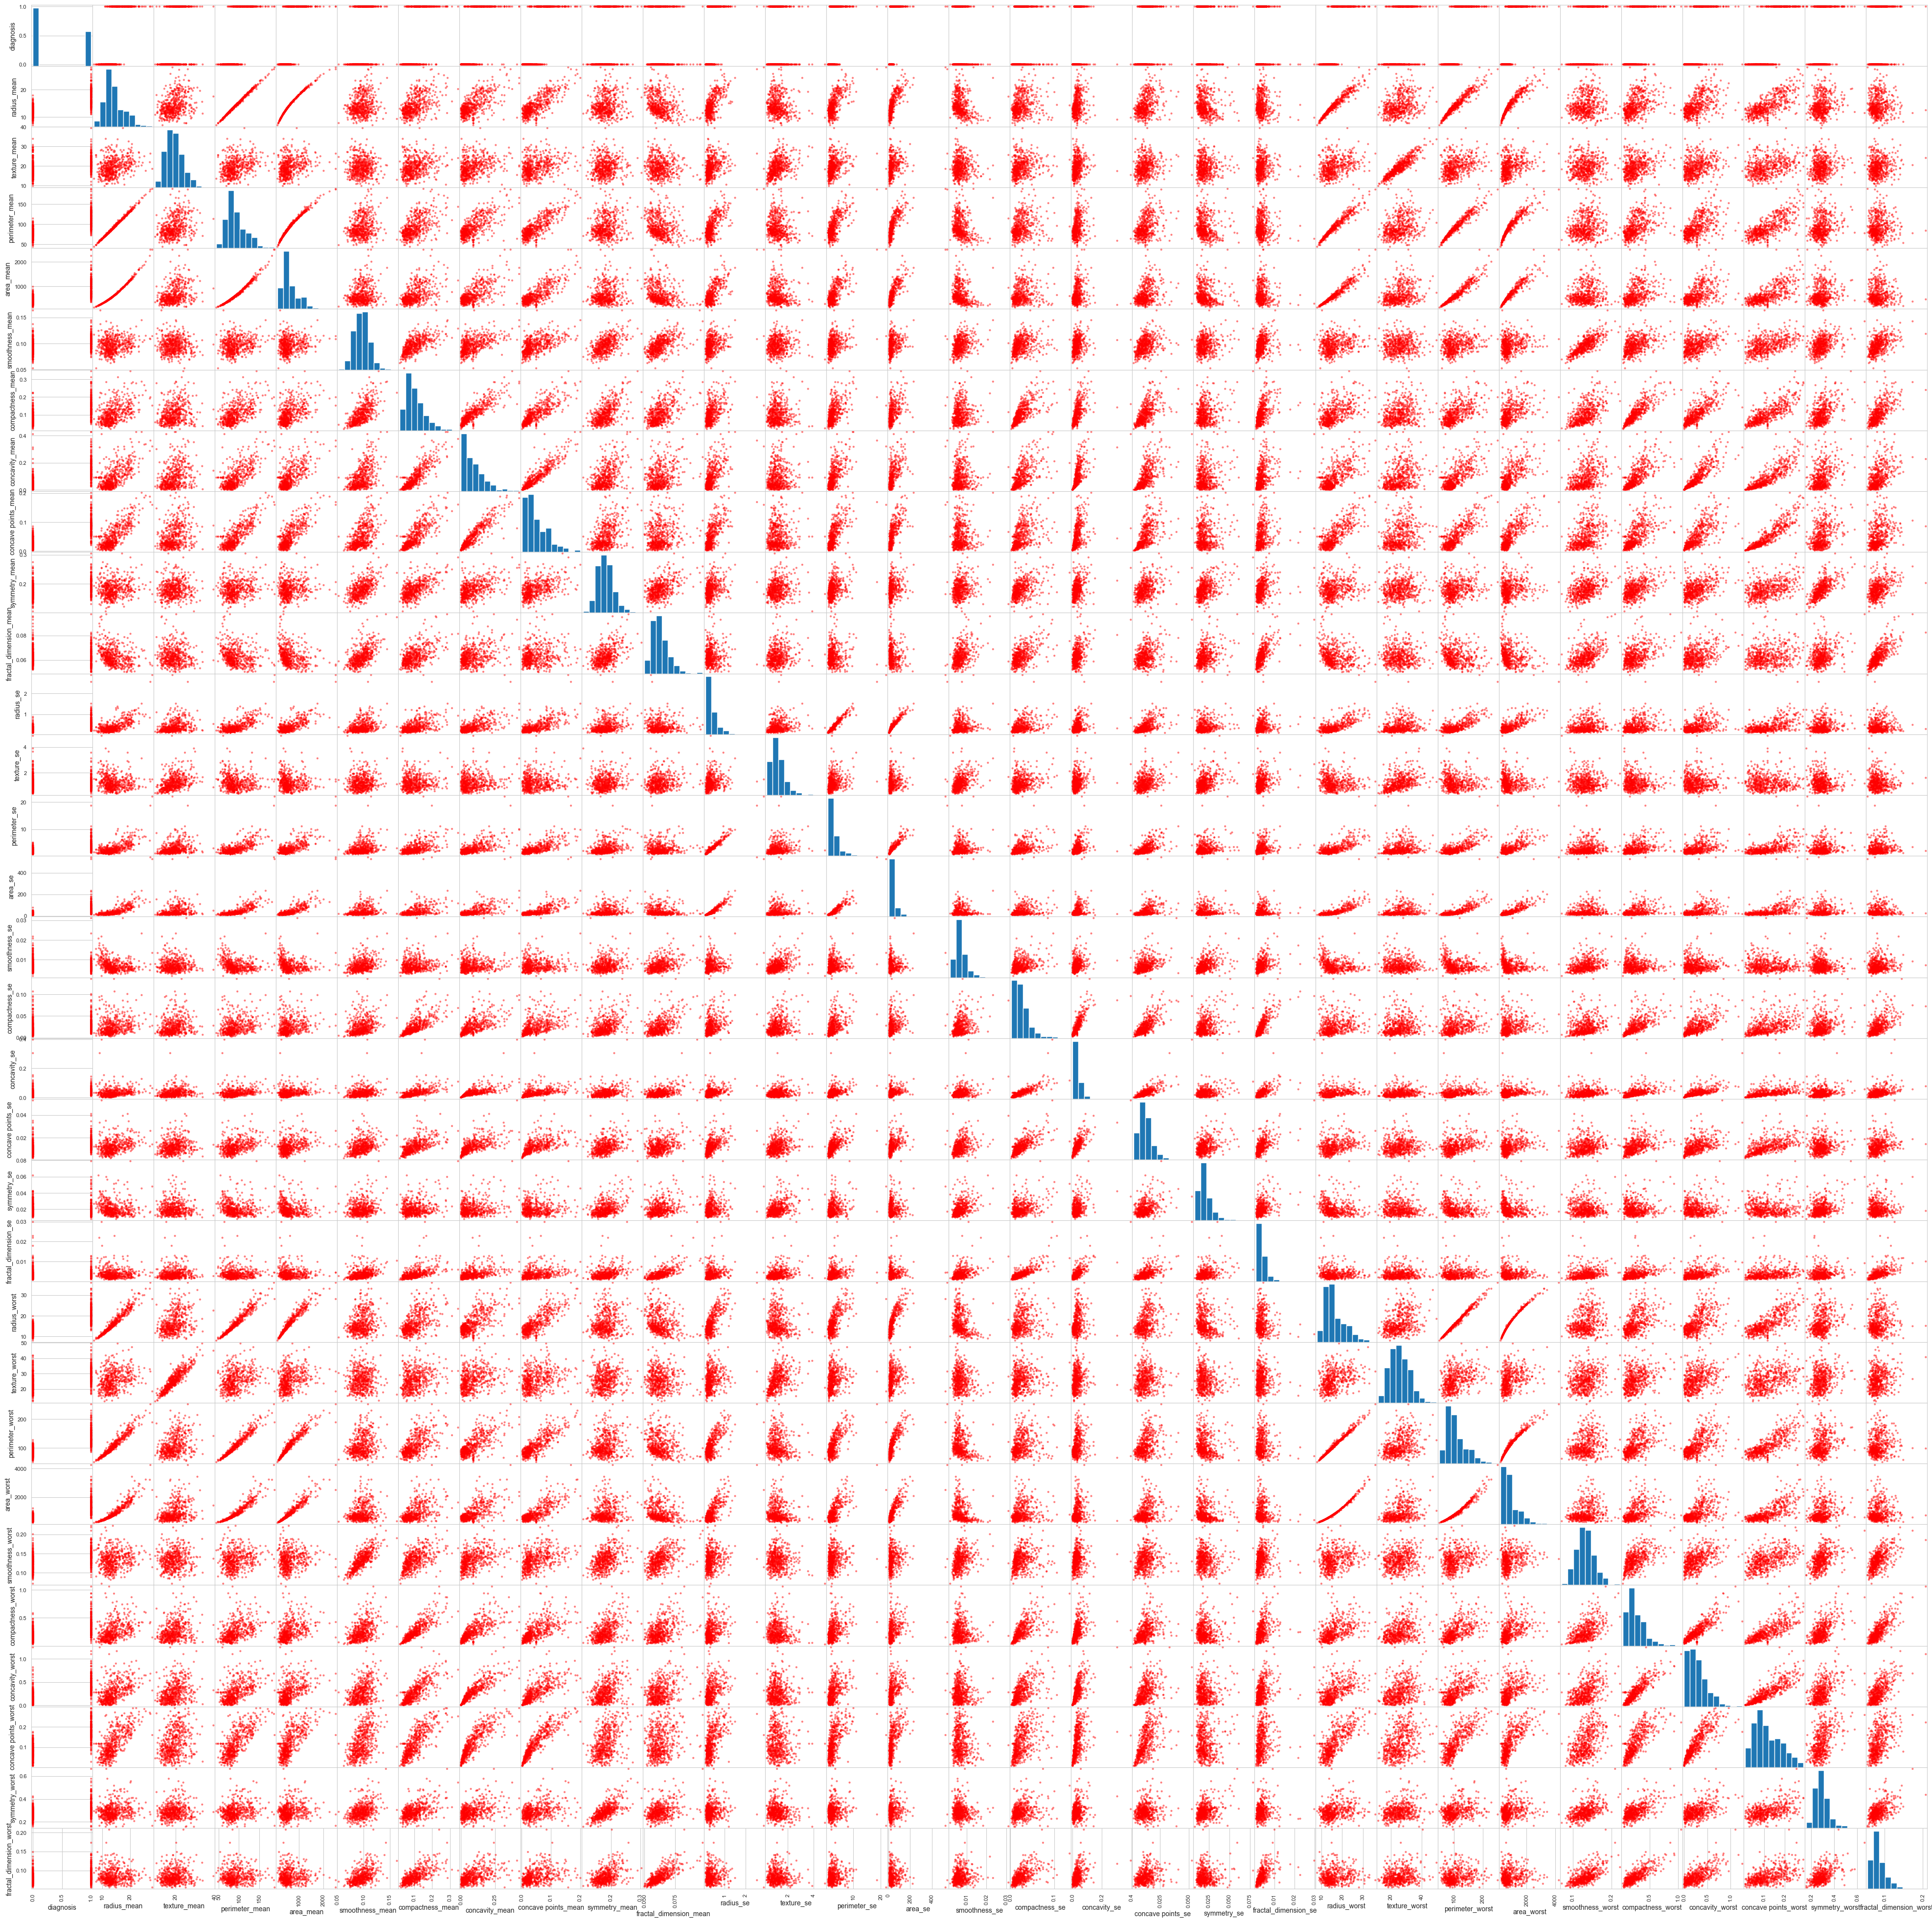

In [19]:
from pandas.plotting import scatter_matrix
scatter_matrix(data,figsize=(50,50),color='red')

# Handling Outliers

### Outliers removal

In [20]:
from sklearn.preprocessing import QuantileTransformer
x=data.drop(['diagnosis'],axis=1)
quantile  = QuantileTransformer(n_quantiles=569)
w=quantile.fit_transform(x)
data_new=pd.DataFrame(w,columns=x.columns)
data_new['diagnosis'] = data['diagnosis'].values

data_new.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     0.837148      0.001761        0.864437   0.839789         0.945423   
1     0.948944      0.390845        0.928697   0.955986         0.218310   
2     0.911972      0.696303        0.909331   0.906690         0.839789   
3     0.205986      0.639085        0.302817   0.174296         0.996479   
4     0.934859      0.110915        0.947183   0.943662         0.627641   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          0.991197        0.973592             0.972711       0.973592   
1          0.389085        0.579225             0.739437       0.536972   
2          0.860035        0.891725             0.954225       0.838908   
3          0.994718        0.945423             0.911972       0.991197   
4          0.774648        0.896127             0.909331       0.529930   

   fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                0.973592  ...       0.077465         0.970951    0.952465   
1                0.179577  ...       0.392606         0.904049    0.943662   
2                0.383803  ...       0.517606         0.885563    0.906690   
3                1.000000  ...       0.591549         0.517606    0.355634   
4                0.296655  ...       0.051056         0.879401    0.866197   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0          0.901408           0.978873         0.968310              0.985915   
1          0.362676           0.406690         0.501761              0.836268   
2          0.730634           0.883803         0.822183              0.957746   
3          0.996479           0.992958         0.952465              0.978873   
4          0.594190           0.475352         0.778169              0.752641   

   symmetry_worst  fractal_dimension_worst  diagnosis  
0        0.975352                 0.947183          1  
1        0.445423                 0.700704          1  
2        0.904049                 0.674296          1  
3        1.000000                 0.998239          1  
4        0.157570                 0.396127          1  

[5 rows x 31 columns]

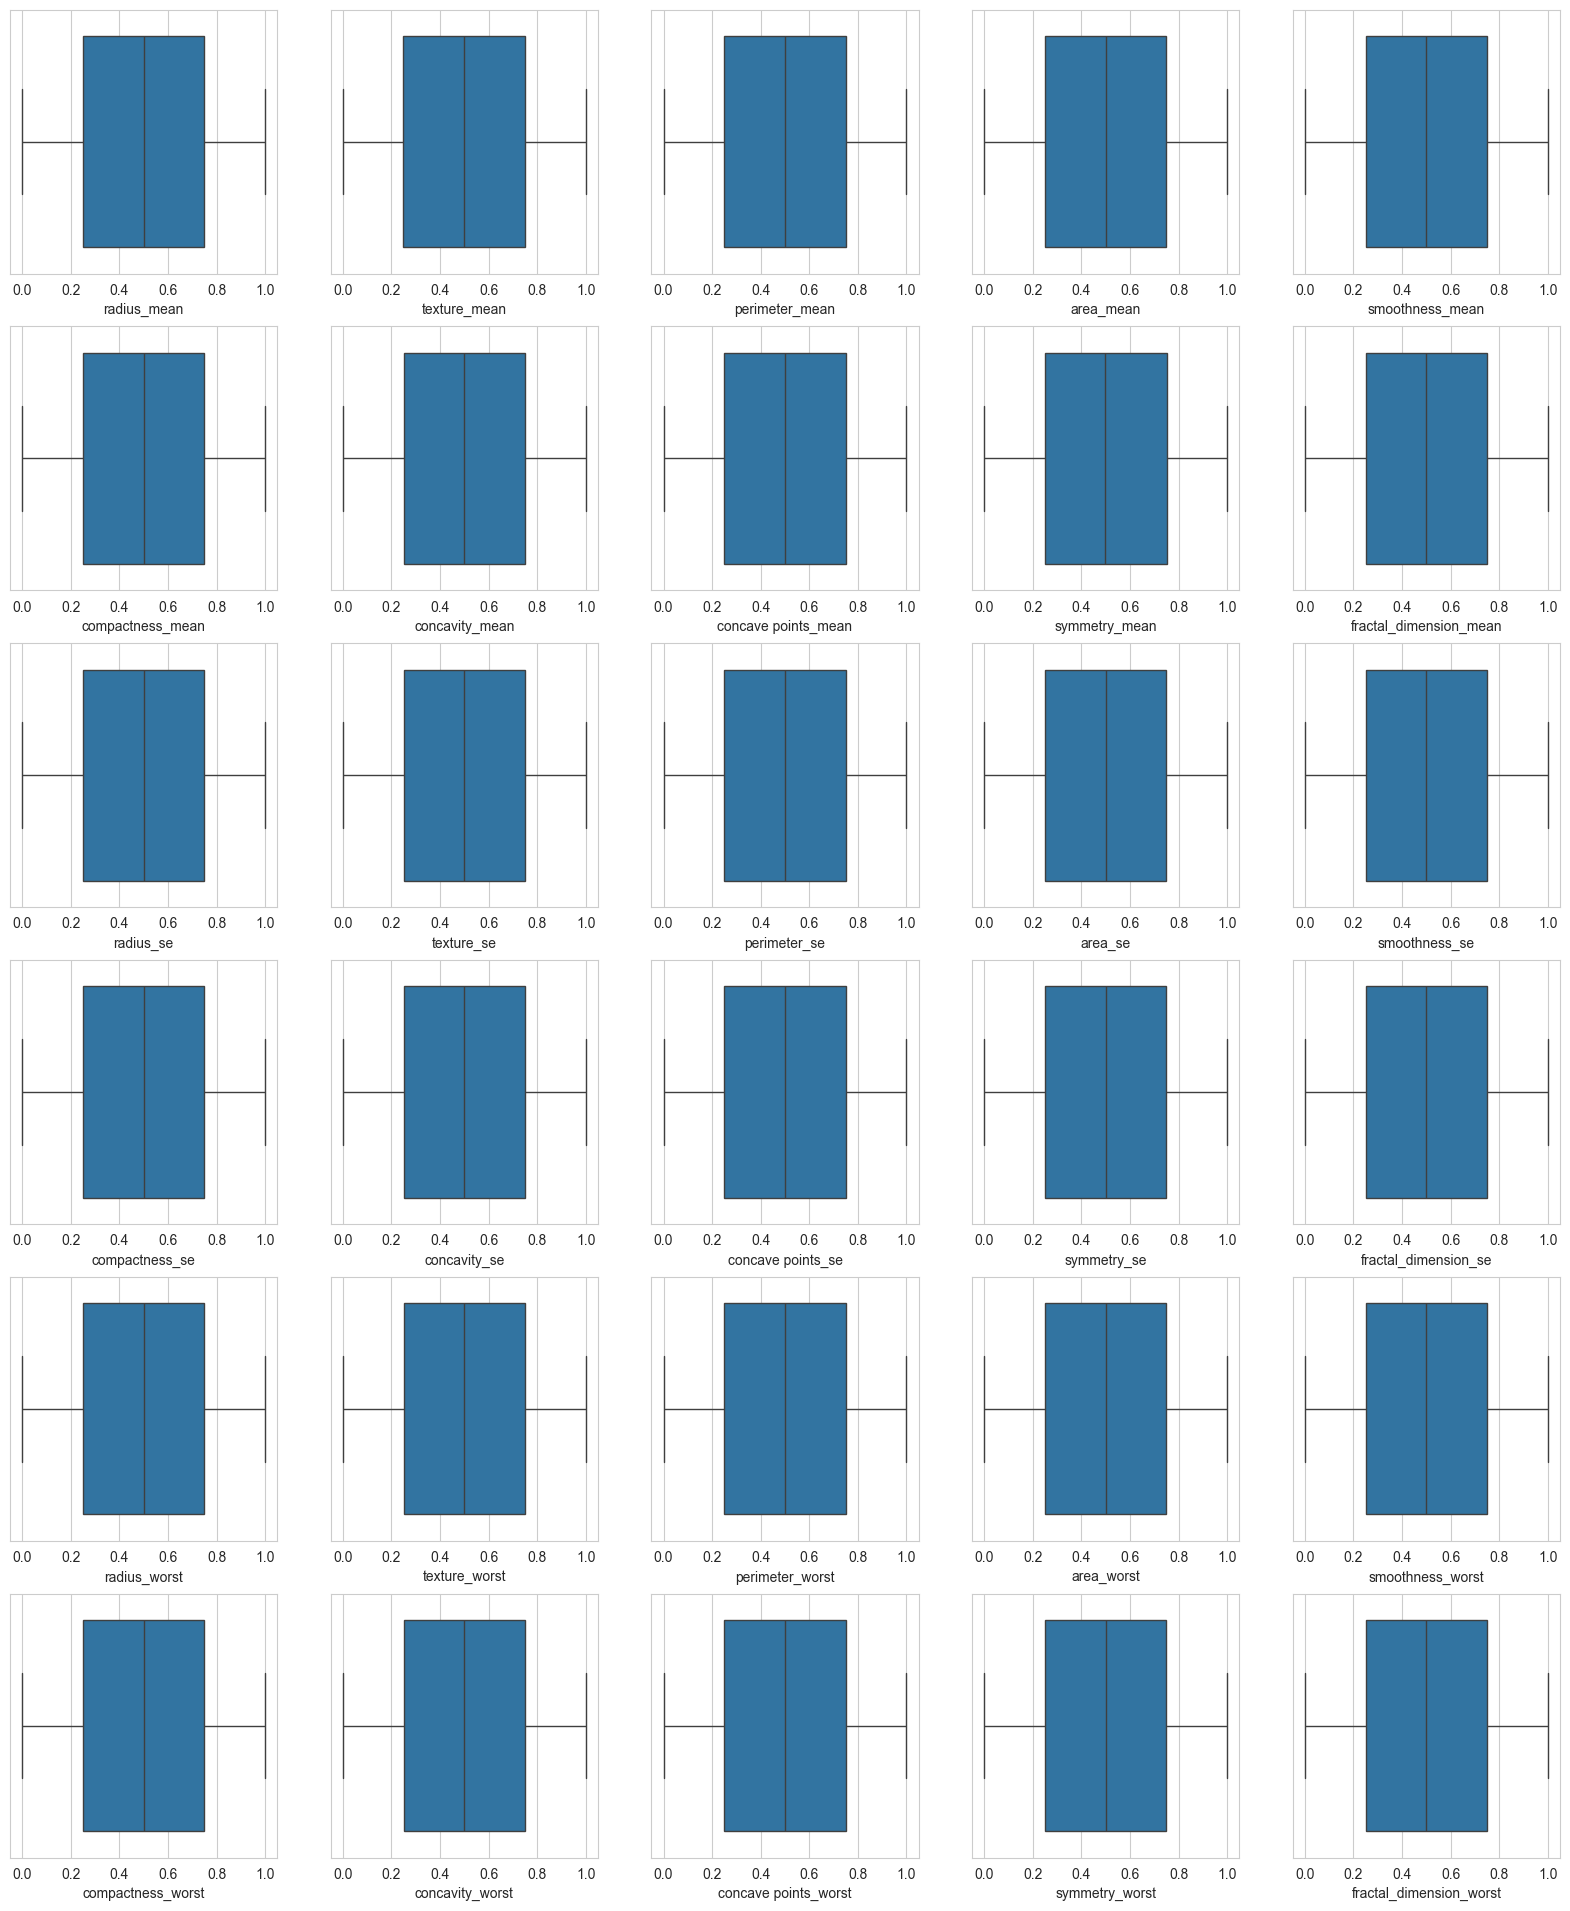

In [21]:
plt.figure(figsize=(20,24)) 
sns.set_style(style='whitegrid')

plt.subplot(6,5,1)
sns.boxplot(x='radius_mean',data=data_new)
plt.subplot(6,5,2)
sns.boxplot(x='texture_mean',data=data_new)
plt.subplot(6,5,3)
sns.boxplot(x='perimeter_mean',data=data_new)
plt.subplot(6,5,4)
sns.boxplot(x='area_mean',data=data_new)
plt.subplot(6,5,5)
sns.boxplot(x='smoothness_mean',data=data_new)

plt.subplot(6,5,6)
sns.boxplot(x='compactness_mean',data=data_new)
plt.subplot(6,5,7)
sns.boxplot(x='concavity_mean',data=data_new)
plt.subplot(6,5,8)
sns.boxplot(x='concave points_mean',data=data_new)
plt.subplot(6,5,9)
sns.boxplot(x='symmetry_mean',data=data_new)
plt.subplot(6,5,10)
sns.boxplot(x='fractal_dimension_mean',data=data_new)

plt.subplot(6,5,11)
sns.boxplot(x='radius_se',data=data_new)
plt.subplot(6,5,12)
sns.boxplot(x='texture_se',data=data_new)
plt.subplot(6,5,13)
sns.boxplot(x='perimeter_se',data=data_new)
plt.subplot(6,5,14)
sns.boxplot(x='area_se',data=data_new)
plt.subplot(6,5,15)
sns.boxplot(x='smoothness_se',data=data_new)

plt.subplot(6,5,16)
sns.boxplot(x='compactness_se',data=data_new)
plt.subplot(6,5,17)
sns.boxplot(x='concavity_se',data=data_new)
plt.subplot(6,5,18)
sns.boxplot(x='concave points_se',data=data_new)
plt.subplot(6,5,19)
sns.boxplot(x='symmetry_se',data=data_new)
plt.subplot(6,5,20)
sns.boxplot(x='fractal_dimension_se',data=data_new)

plt.subplot(6,5,21)
sns.boxplot(x='radius_worst',data=data_new)
plt.subplot(6,5,22)
sns.boxplot(x='texture_worst',data=data_new)
plt.subplot(6,5,23)
sns.boxplot(x='perimeter_worst',data=data_new)
plt.subplot(6,5,24)
sns.boxplot(x='area_worst',data=data_new)
plt.subplot(6,5,25)
sns.boxplot(x='smoothness_worst',data=data_new)

plt.subplot(6,5,26)
sns.boxplot(x='compactness_worst',data=data_new)
plt.subplot(6,5,27)
sns.boxplot(x='concavity_worst',data=data_new)
plt.subplot(6,5,28)
sns.boxplot(x='concave points_worst',data=data_new)
plt.subplot(6,5,29)
sns.boxplot(x='symmetry_worst',data=data_new)
plt.subplot(6,5,30)
sns.boxplot(x='fractal_dimension_worst',data=data_new)

plt.show()


In [22]:
#sns.pairplot(data_new,hue="diagnosis")

#  Split Dataset for dependent and independent Features

In [23]:
X=data_new.drop(['diagnosis'],axis=1)
y=data_new['diagnosis']   

In [24]:
from imblearn.over_sampling import SMOTE

In [25]:
from sklearn.preprocessing import StandardScaler

# Train Test Split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [29]:
from collections import Counter
print("Resampled dataset class distribution:", Counter(y_train_resampled))

Resampled dataset class distribution: Counter({0: 290, 1: 290})


<Axes: xlabel='diagnosis', ylabel='count'>

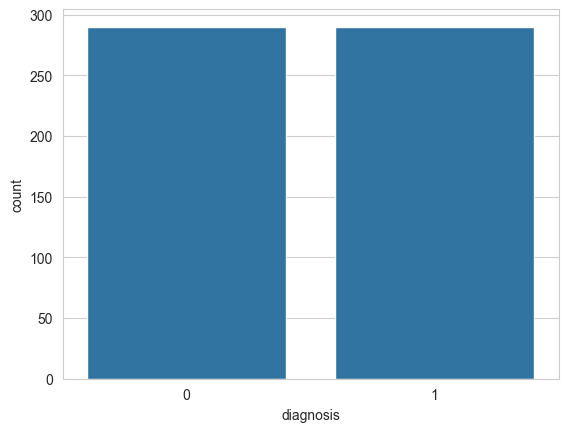

In [38]:
sns.countplot(x=y_train_resampled)

In [30]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.neural_network import MLPClassifier


from sklearn.model_selection import cross_validate, KFold


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [31]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

models = {
    "Support Vector Machine": SVC(
        C=10, degree=3, gamma= 0.001, kernel='rbf'
    ),
    
    "KNN": KNeighborsClassifier(
        n_neighbors=30,            
        weights='uniform',        
        algorithm='auto',         
        p=1                      
    ),
    
    "Naive Bayes": GaussianNB(
        var_smoothing=1e-9        
    ),
    
    "Neural Network": MLPClassifier(
        hidden_layer_sizes=(100, 50),   
        activation='relu',              
        solver='adam',                  
        max_iter=1000,                  
        alpha=0.0001,                   
        learning_rate='adaptive',       
        learning_rate_init=0.001,       
        random_state=0
    )
}


In [32]:
k_values = [35,36,37,38,39,40]

results = {model_name: {"accuracy": [], "precision": [], "recall": [], "f1_score": [], "roc_auc": []} 
           for model_name in models}


for k in k_values:
    
    kf = KFold(n_splits=k, shuffle=True, random_state=0)
    
    for model_name, model in models.items():
    
        scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'roc_auc']
        scores = cross_validate(model, X_train_resampled, y_train_resampled, cv=kf, scoring=scoring)
        
    
        results[model_name]["accuracy"].append(np.mean(scores['test_accuracy']))
        results[model_name]["precision"].append(np.mean(scores['test_precision_macro']))
        results[model_name]["recall"].append(np.mean(scores['test_recall_macro']))
        results[model_name]["f1_score"].append(np.mean(scores['test_f1_macro']))
        results[model_name]["roc_auc"].append(np.mean(scores['test_roc_auc']))

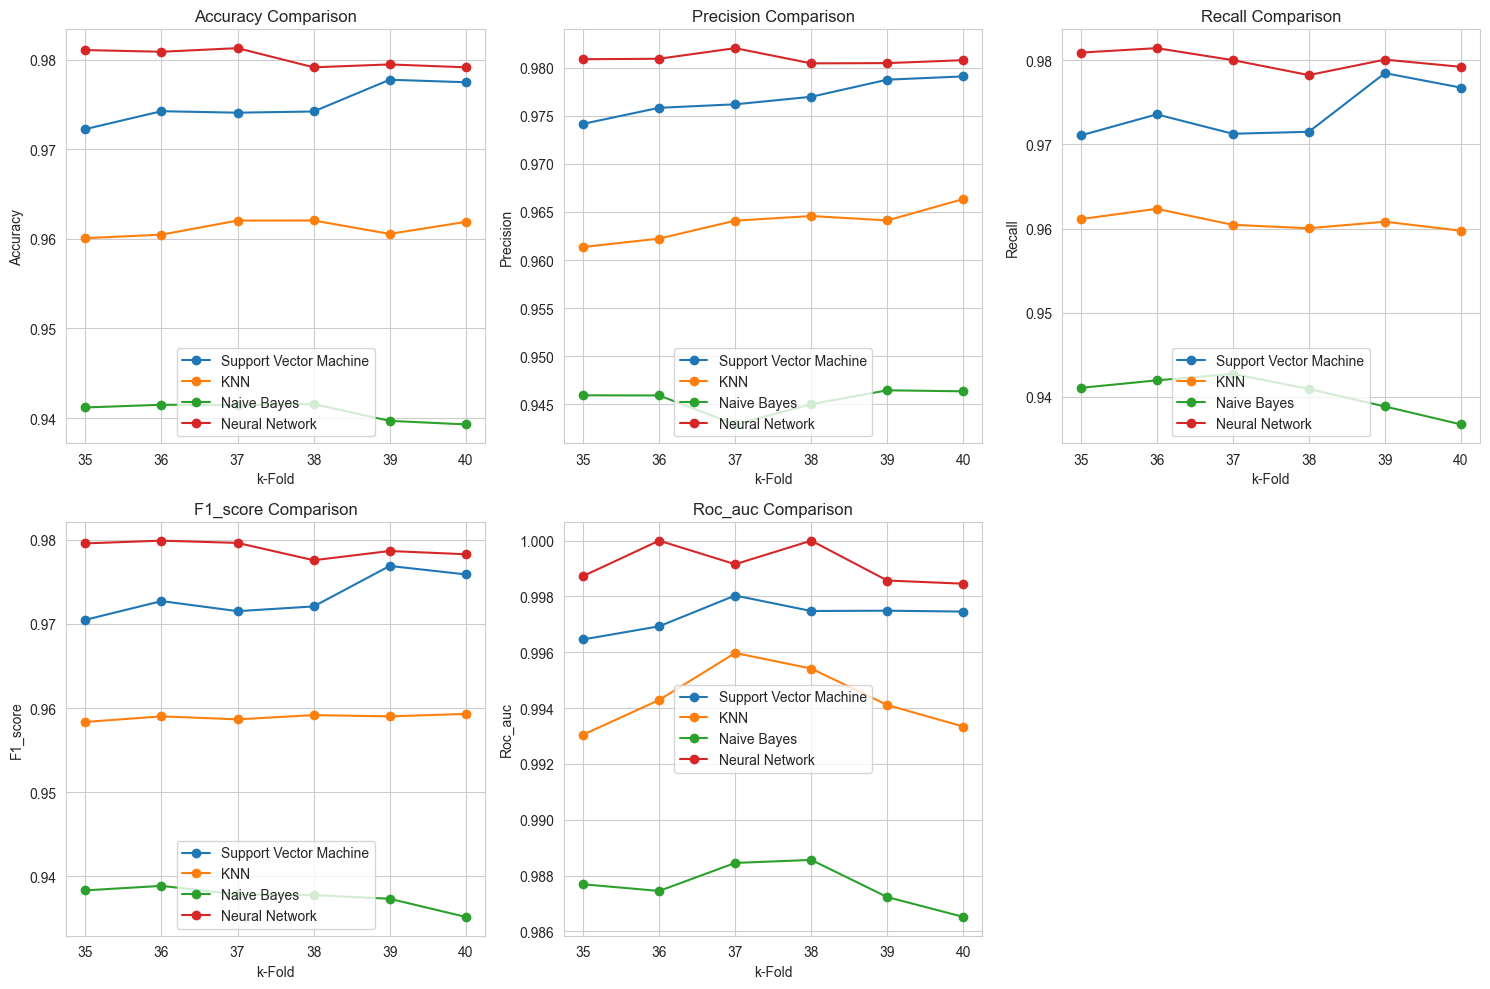

In [33]:
metrics = ["accuracy", "precision", "recall", "f1_score", "roc_auc"]

plt.figure(figsize=(15, 10))


for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    
    for model in models:
        plt.plot(k_values, results[model][metric], marker='o', label=model)
    
    plt.title(f"{metric.capitalize()} Comparison")
    plt.xlabel("k-Fold")
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

In [34]:

table_data = []
for model_name, scores in results.items():
    row = {
        "Model": model_name,
        "Accuracy": ", ".join(["{:.4f}".format(score) for score in scores["accuracy"]]),
        "Precision": ", ".join(["{:.4f}".format(score) for score in scores["precision"]]),
        "Recall": ", ".join(["{:.4f}".format(score) for score in scores["recall"]]),
        "F1-Score": ", ".join(["{:.4f}".format(score) for score in scores["f1_score"]]),
        "AUC-ROC": ", ".join(["{:.4f}".format(score) for score in scores["roc_auc"]]),
    }
    table_data.append(row)

modelcomparison = pd.DataFrame(table_data)

modelcomparison

Model                                        Accuracy  \
0  Support Vector Machine  0.9723, 0.9743, 0.9741, 0.9742, 0.9778, 0.9775   
1                     KNN  0.9601, 0.9605, 0.9620, 0.9621, 0.9606, 0.9619   
2             Naive Bayes  0.9412, 0.9415, 0.9414, 0.9416, 0.9397, 0.9393   
3          Neural Network  0.9811, 0.9809, 0.9813, 0.9792, 0.9795, 0.9792   

                                        Precision  \
0  0.9742, 0.9758, 0.9762, 0.9770, 0.9788, 0.9791   
1  0.9614, 0.9622, 0.9641, 0.9646, 0.9641, 0.9663   
2  0.9459, 0.9459, 0.9429, 0.9450, 0.9464, 0.9463   
3  0.9809, 0.9809, 0.9821, 0.9805, 0.9805, 0.9808   

                                           Recall  \
0  0.9711, 0.9736, 0.9713, 0.9715, 0.9785, 0.9768   
1  0.9611, 0.9624, 0.9604, 0.9600, 0.9608, 0.9597   
2  0.9411, 0.9420, 0.9427, 0.9409, 0.9389, 0.9367   
3  0.9809, 0.9814, 0.9800, 0.9782, 0.9801, 0.9792   

                                         F1-Score  \
0  0.9705, 0.9727, 0.9715, 0.9721, 0.9769, 0.9759   
1  0.9584, 0.9590, 0.9587, 0.9592, 0.9590, 0.9593   
2  0.9384, 0.9389, 0.9379, 0.9378, 0.9374, 0.9352   
3  0.9796, 0.9799, 0.9796, 0.9776, 0.9787, 0.9783   

                                          AUC-ROC  
0  0.9965, 0.9969, 0.9980, 0.9975, 0.9975, 0.9975  
1  0.9930, 0.9943, 0.9960, 0.9954, 0.9941, 0.9933  
2  0.9877, 0.9875, 0.9885, 0.9886, 0.9872, 0.9865  
3  0.9987, 1.0000, 0.9992, 1.0000, 0.9986, 0.9985

In [35]:

summary_data = []

for model_name, scores in results.items():
    for i, k in enumerate(k_values):
        summary_data.append([
            model_name if i == 0 else "",  
            k,
            f"{scores['accuracy'][i]:.4f}",
            f"{scores['precision'][i]:.4f}",
            f"{scores['recall'][i]:.4f}",
            f"{scores['f1_score'][i]:.4f}",
            f"{scores['roc_auc'][i]:.4f}",
        ])


columns = ["Model", "k", "Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC"]
summary_df = pd.DataFrame(summary_data, columns=columns)


summary_df.to_string(index=False)
summary_df

Model   k Accuracy Precision  Recall F1-Score AUC-ROC
0   Support Vector Machine  35   0.9723    0.9742  0.9711   0.9705  0.9965
1                           36   0.9743    0.9758  0.9736   0.9727  0.9969
2                           37   0.9741    0.9762  0.9713   0.9715  0.9980
3                           38   0.9742    0.9770  0.9715   0.9721  0.9975
4                           39   0.9778    0.9788  0.9785   0.9769  0.9975
5                           40   0.9775    0.9791  0.9768   0.9759  0.9975
6                      KNN  35   0.9601    0.9614  0.9611   0.9584  0.9930
7                           36   0.9605    0.9622  0.9624   0.9590  0.9943
8                           37   0.9620    0.9641  0.9604   0.9587  0.9960
9                           38   0.9621    0.9646  0.9600   0.9592  0.9954
10                          39   0.9606    0.9641  0.9608   0.9590  0.9941
11                          40   0.9619    0.9663  0.9597   0.9593  0.9933
12             Naive Bayes  35   0.9412    0.9459  0.9411   0.9384  0.9877
13                          36   0.9415    0.9459  0.9420   0.9389  0.9875
14                          37   0.9414    0.9429  0.9427   0.9379  0.9885
15                          38   0.9416    0.9450  0.9409   0.9378  0.9886
16                          39   0.9397    0.9464  0.9389   0.9374  0.9872
17                          40   0.9393    0.9463  0.9367   0.9352  0.9865
18          Neural Network  35   0.9811    0.9809  0.9809   0.9796  0.9987
19                          36   0.9809    0.9809  0.9814   0.9799  1.0000
20                          37   0.9813    0.9821  0.9800   0.9796  0.9992
21                          38   0.9792    0.9805  0.9782   0.9776  1.0000
22                          39   0.9795    0.9805  0.9801   0.9787  0.9986
23                          40   0.9792    0.9808  0.9792   0.9783  0.9985